In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
sns.set_context('poster')
sns.set_color_codes()

from onc.onc import ONC

%matplotlib inline

In [2]:
onc = ONC('533c0804-3482-4efb-813b-681d357440d6')


#Baynes location codes
#BSM.J1 	5mbss 
#BSM.J2 	20mbss 
#BSM.J3 	40mbss 

filters = {
    'locationCode': 'BSM.J1',
    'deviceCategoryCode': 'CTD',
    'qualityControl': 'raw',
    'sensorCategoryCodes': 'conductivity,temperature',
    'dateFrom':'2020-01-19T00:00:00.000Z',
    'dateTo':'2020-01-19T23:59:59.999Z'
}
result = onc.getDirectByLocation(filters)
#onc.print(result)

d = {'Conductivity (S/m)':[],'Temperature (C)':[]}
d['Conductivity (S/m)'] = result['sensorData'][0]['data']['values']
d['Temperature (C)'] = result['sensorData'][1]['data']['values']
df = pd.DataFrame.from_dict(d)

In [3]:
X = df[['Conductivity (S/m)','Temperature (C)']].values

In [4]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(X[:,0],X[:,1], c=colors)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clustering took {:.2f} s'.format(end_time - start_time), fontsize=24)

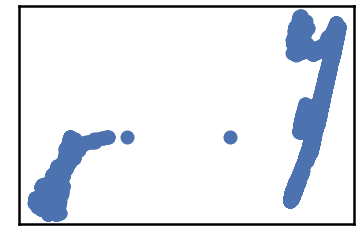

In [5]:
plt.scatter(X[:,0], X[:,1], c='b')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

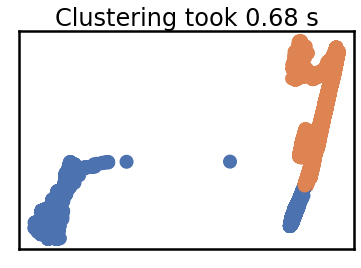

In [6]:
plot_clusters(X, cluster.KMeans,(), {'n_clusters':2})

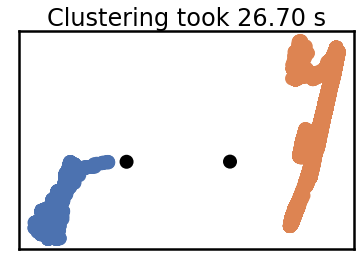

In [11]:
plot_clusters(X, cluster.DBSCAN, (), {'eps':0.01})

In [ ]:
import hdbscan
plot_clusters(X, hdbscan.HDBSCAN, (), {'min_cluster_size':8050, 'min_samples':5000})


In [8]:
plot_clusters(X, cluster.OPTICS, (), {'min_cluster_size':15000})

KeyboardInterrupt: 